<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/ansalnaSOHandRUL06b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1144]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [1145]:
import pandas as pd

In [1146]:
data=pd.read_csv("/content/B0006.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [1147]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


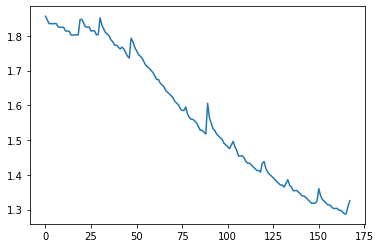

In [1148]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [1149]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [1150]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

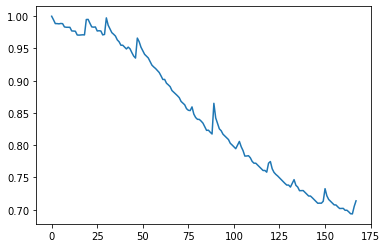

In [1151]:
plt.plot(range(len(soh)),soh)
plt.show()

In [1152]:
capacity=np.asarray(capacity)

In [1153]:
type(capacity)

numpy.ndarray

In [1154]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [1155]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1156]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 0.5800
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0671
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0247
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0193
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0021


In [1157]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1158]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [1159]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 4ms/step


0.00012213591110162223

In [1160]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.011


In [1161]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.00870384]
R2_score:  0.837718658348866


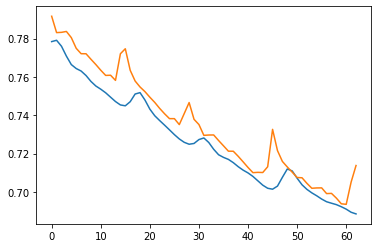

In [1162]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [1163]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1164]:
preds

array([[0.94243   ],
       [0.9408974 ],
       [0.94055545],
       [0.94031847],
       [0.93918806],
       [0.9373633 ],
       [0.9361487 ],
       [0.93541545],
       [0.934138  ],
       [0.93220794],
       [0.93064123],
       [0.9289452 ],
       [0.92691606],
       [0.92572874],
       [0.9254878 ],
       [0.9269437 ],
       [0.93214583],
       [0.9397435 ],
       [0.94290555],
       [0.941011  ],
       [0.9378959 ],
       [0.93602884],
       [0.9344047 ],
       [0.9324304 ],
       [0.93090045],
       [0.9292242 ],
       [0.9287835 ],
       [0.9327258 ],
       [0.93827075],
       [0.9380531 ],
       [0.9338923 ],
       [0.92950445],
       [0.9262601 ],
       [0.9230576 ],
       [0.9194513 ],
       [0.91598165],
       [0.9131389 ],
       [0.91114146],
       [0.90943867],
       [0.9083591 ],
       [0.9076429 ],
       [0.90557605],
       [0.90191317],
       [0.89993143],
       [0.90392673],
       [0.9116006 ],
       [0.91355085],
       [0.909

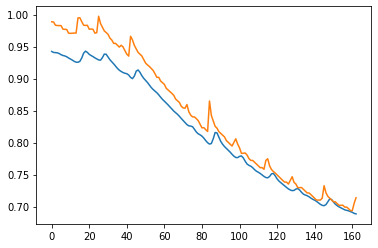

In [1165]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [1166]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [1167]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 2.3037
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4054
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.3977
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0526
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1532
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0632
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0290
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0037


In [1168]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1169]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 5ms/step


0.013885376547670171

In [1170]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.118


In [1171]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.11714165]
R2_score:  -4.353019838279148


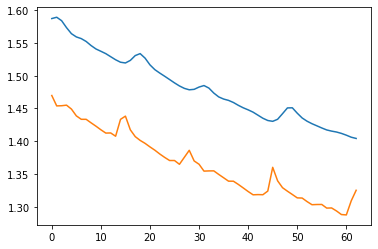

In [1172]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [1173]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1174]:
preds

array([[1.9238032],
       [1.9201703],
       [1.9194394],
       [1.918944 ],
       [1.9168972],
       [1.9133713],
       [1.91049  ],
       [1.9089637],
       [1.9065717],
       [1.9028629],
       [1.8992409],
       [1.8959788],
       [1.8920609],
       [1.8891447],
       [1.8885893],
       [1.8914503],
       [1.9011472],
       [1.9157304],
       [1.9244514],
       [1.9211512],
       [1.9145178],
       [1.910251 ],
       [1.9071214],
       [1.9033421],
       [1.8997306],
       [1.8965733],
       [1.895711 ],
       [1.9022555],
       [1.9130887],
       [1.9155198],
       [1.9066322],
       [1.8974836],
       [1.8906032],
       [1.8841947],
       [1.8769654],
       [1.8697072],
       [1.863857 ],
       [1.859448 ],
       [1.8561665],
       [1.8537468],
       [1.852049 ],
       [1.8484273],
       [1.8411969],
       [1.8368176],
       [1.8434253],
       [1.8578601],
       [1.8650141],
       [1.8575562],
       [1.8466562],
       [1.8380101],


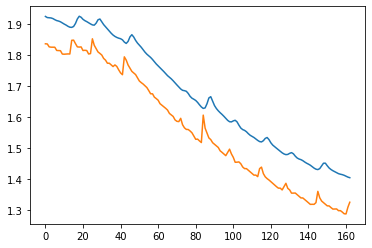

In [1175]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()